<a href="https://colab.research.google.com/github/GokayToga/Heart-Attack-Classification/blob/main/ClasificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Machine Learning: Clasification - Final Assignment**





# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# 1.Dataset

The dataset I am using is a dataset for heart attack analysis and prediction taken from kaggle,

This dataset offers insights into predicting heart disease risk. It has demographic information like age and sex alongside details on chest pain type, blood pressure, cholesterol levels, and results from various medical examinations. Even more critical is the inclusion of a target variable indicating a patient's high or low chance of experiencing a heart attack.

By analyzing these factors, researchers can uncover which aspects significantly influence heart disease risk.

In [ ]:
data = pd.read_csv('heart.csv')
#/content/heart.csv

## 1.2 Aboout the Data

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


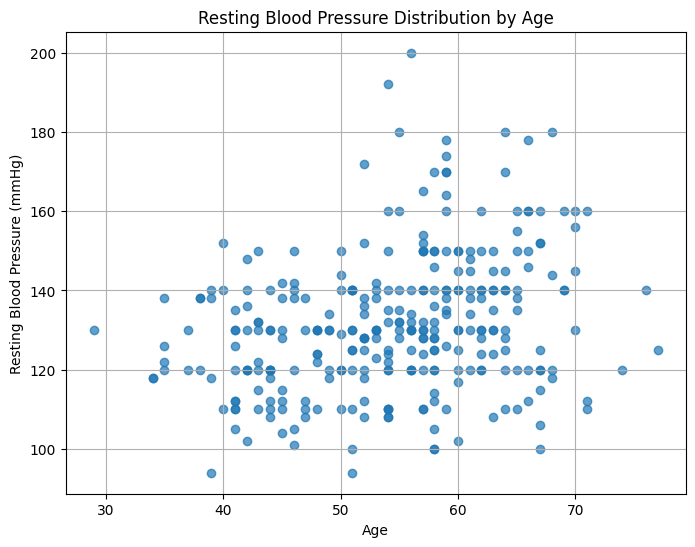

In [ ]:
# Scatter plot - Age vs Resting Blood Pressure
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['trtbps'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.title('Resting Blood Pressure Distribution by Age')
plt.grid(True)
plt.show()

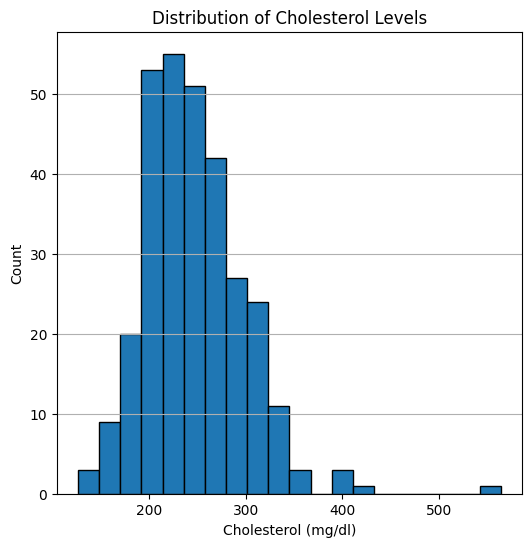

In [ ]:
# Histogram - Cholesterol Distribution
plt.figure(figsize=(6, 6))
plt.hist(data['chol'], bins=20, edgecolor='black')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Levels')
plt.grid(axis='y')
plt.show()

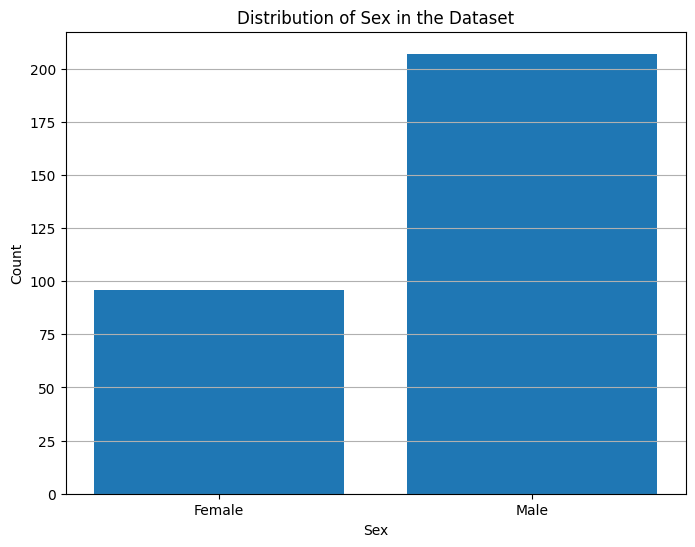

In [ ]:
# Bar chart - Sex vs Chest Pain Type (categorical variables)
plt.figure(figsize=(8, 6))
plt.bar(data['sex'].value_counts().index, data['sex'].value_counts().values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in the Dataset')
plt.xticks([0, 1], ['Female', 'Male'])  # Set custom labels for x-axis
plt.grid(axis='y')
plt.show()

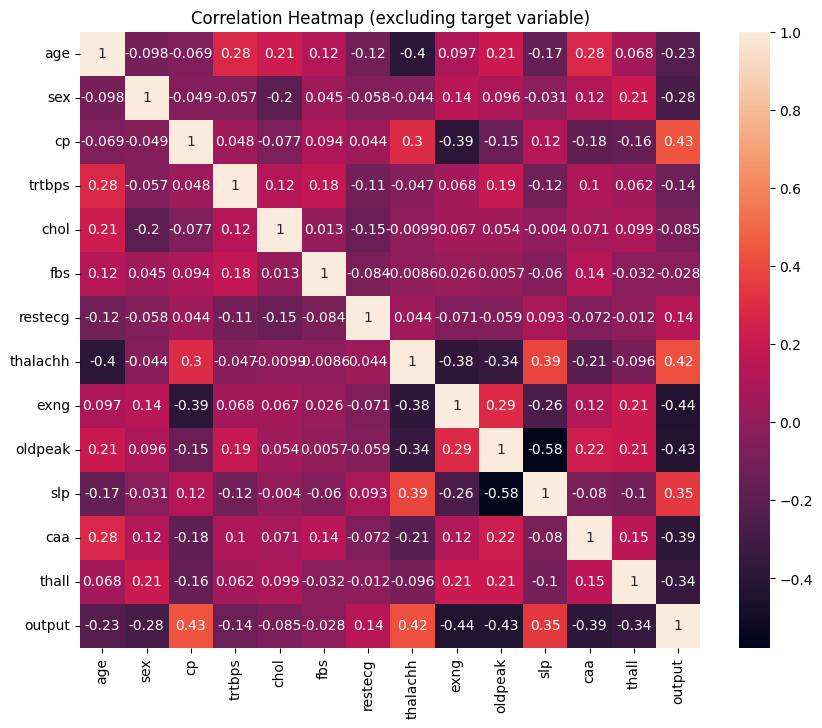

In [ ]:
# Calculate correlation matrix
features = data.columns
correlation = data[features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation, annot=True)  # Using seaborn for heatmap
ax.set_title('Correlation Heatmap (excluding target variable)')
plt.show()

Here we can see Heart Disease has a  negative correlation with "thalachh" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak" and "restecg"

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

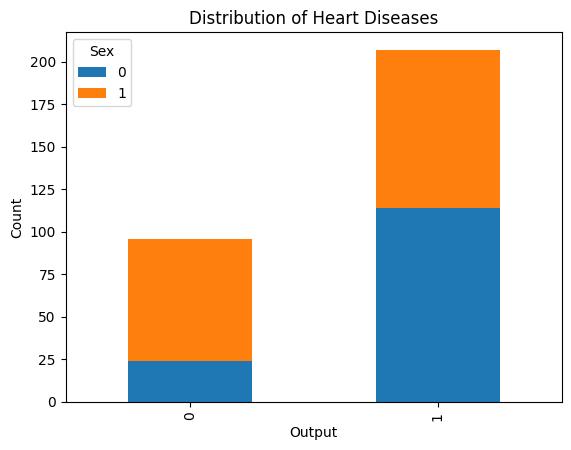

In [55]:
# Group data by 'sex' and 'output'
grouped_data = data.groupby(['sex', 'output']).size().unstack()

# Plotting
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Output')
ax.set_ylabel('Count')
ax.set_title('Distribution of Heart Diseases')
ax.legend(title='Sex')

plt.show()


<Figure size 800x600 with 0 Axes>

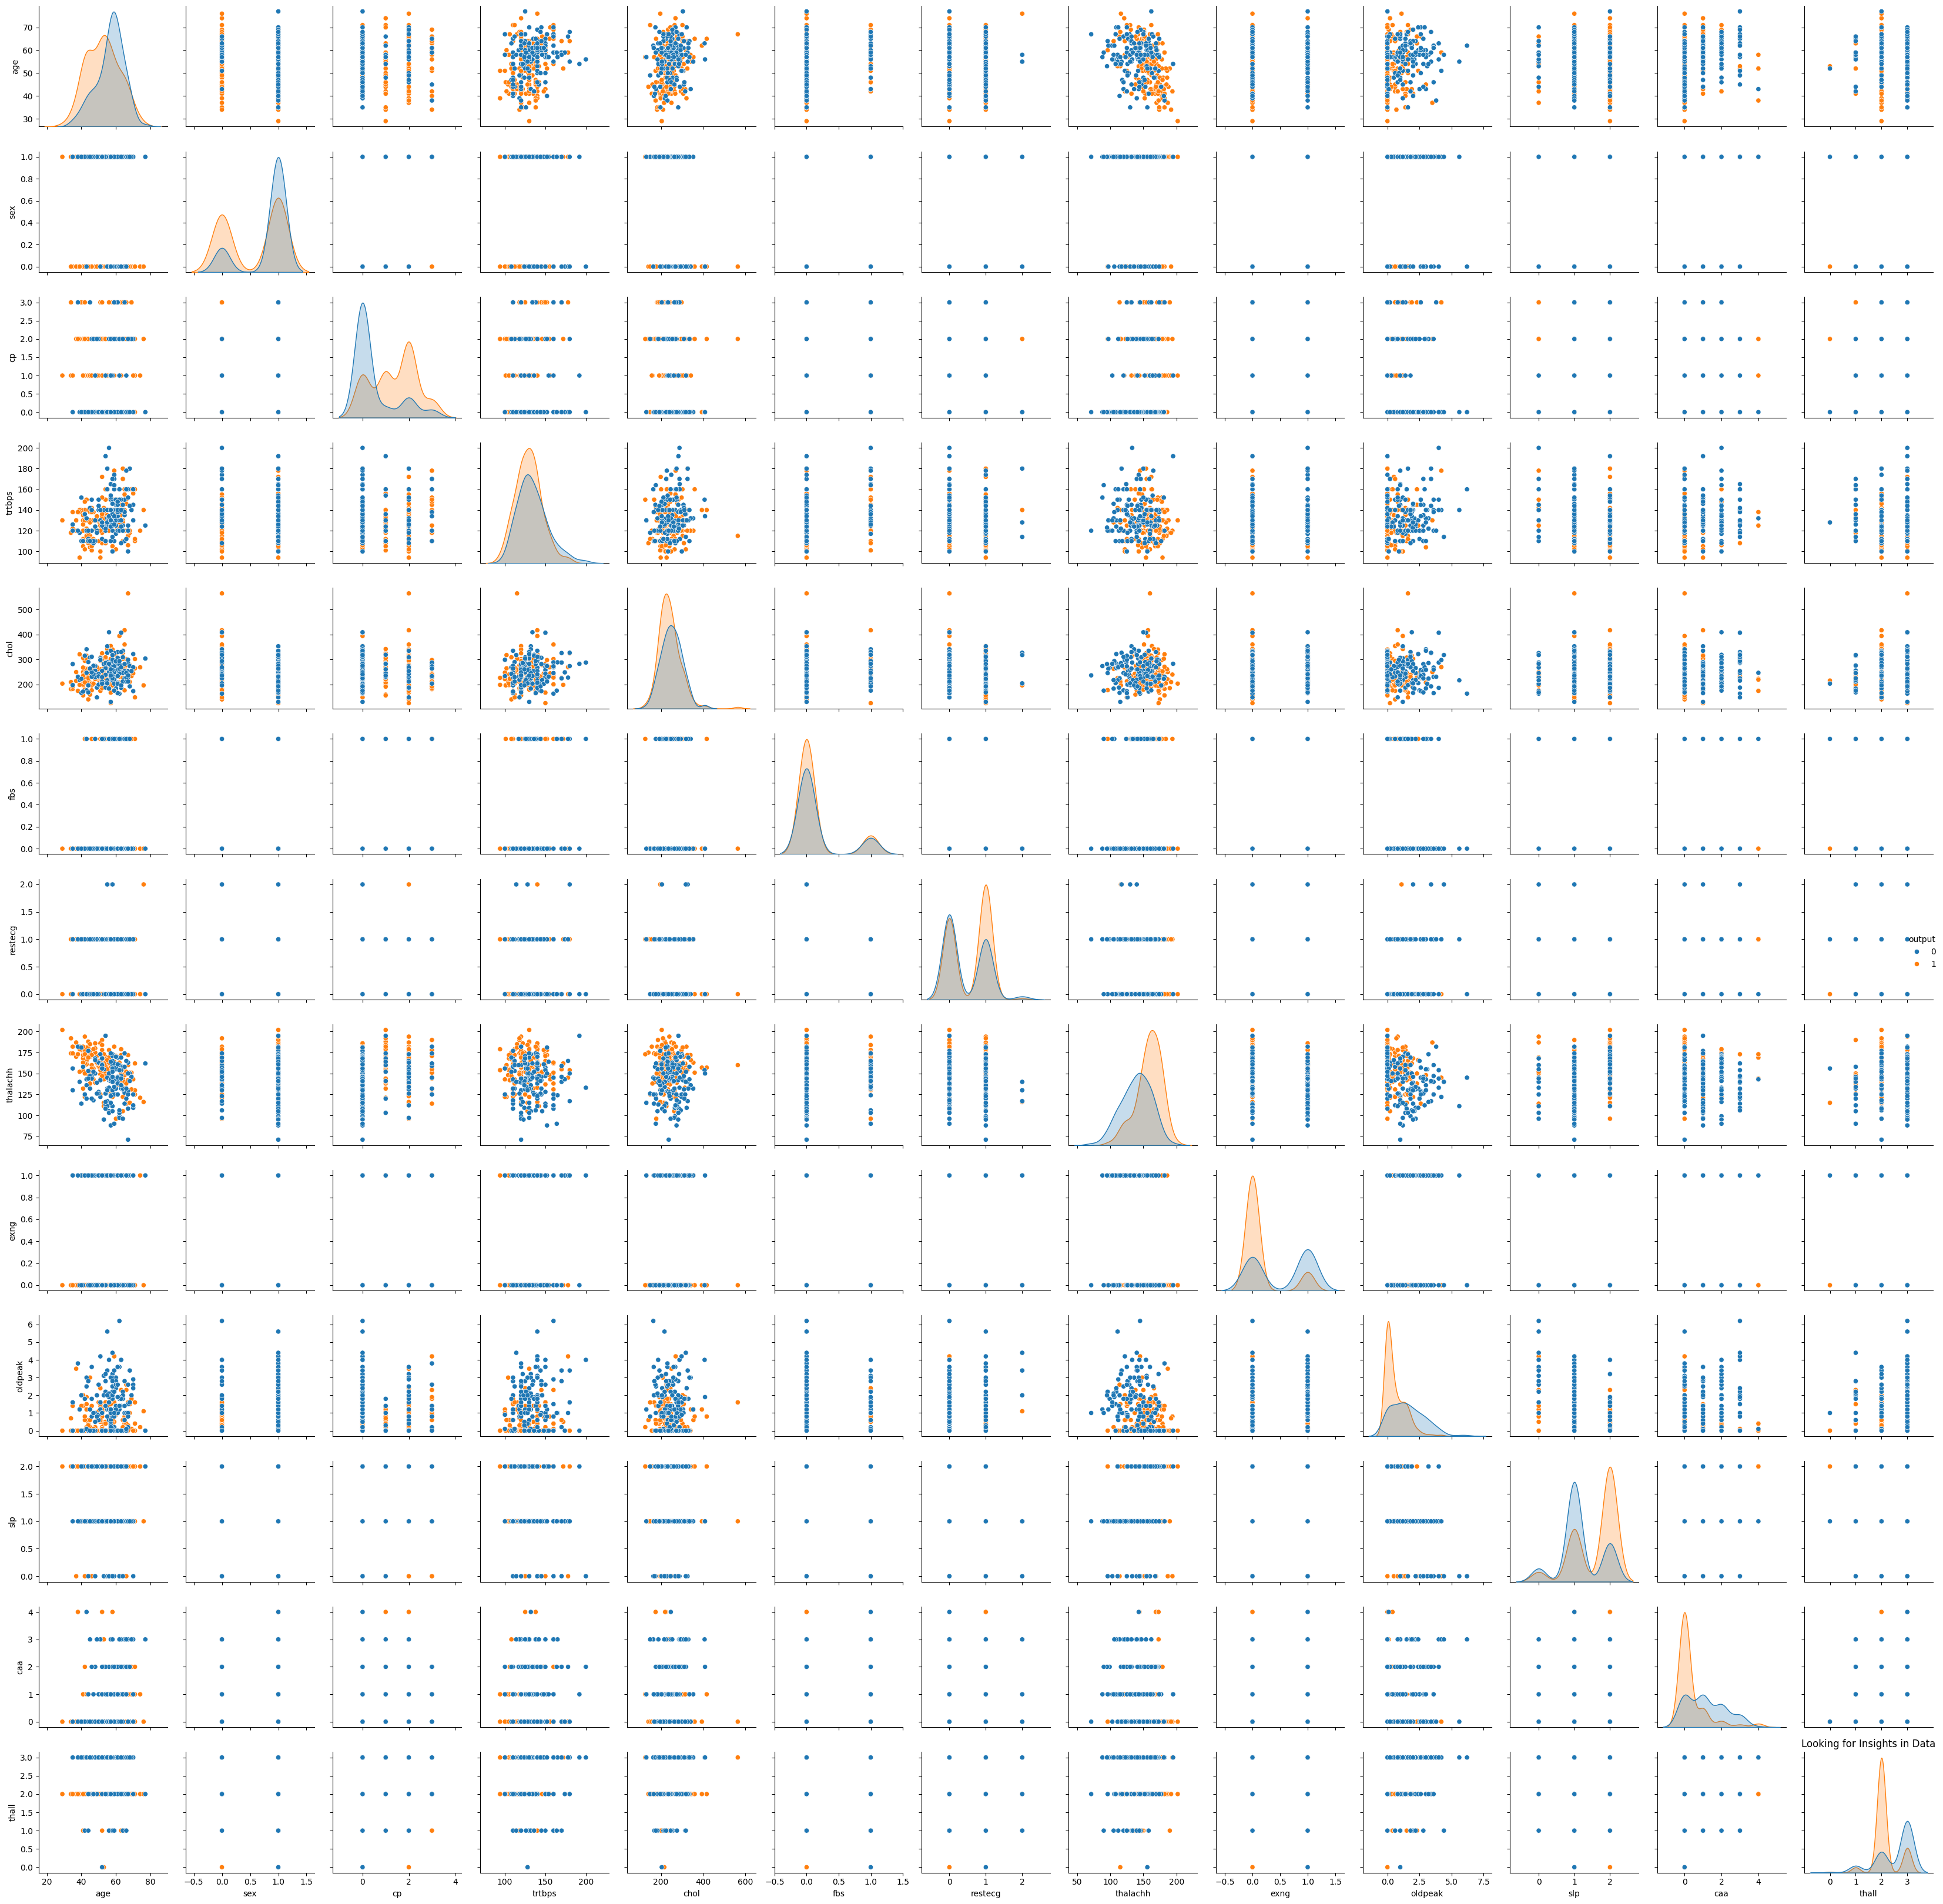

In [54]:
plt.figure(figsize=(8, 6))
sns.pairplot(data, hue="output")
plt.title("Looking for Insights in Data")
plt.tight_layout()
plt.show()


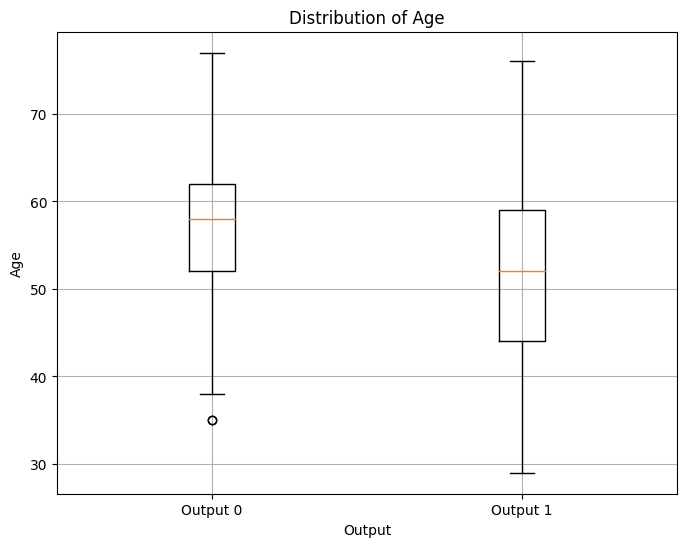

In [56]:

plt.figure(figsize=(8, 6))
# Extracting data for each output category
output_0_age = data[data['output'] == 0]['age']
output_1_age = data[data['output'] == 1]['age']
plt.boxplot([output_0_age, output_1_age], labels=['Output 0', 'Output 1'])

# Setting labels and title
plt.xlabel('Output')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.grid(True)

plt.show()


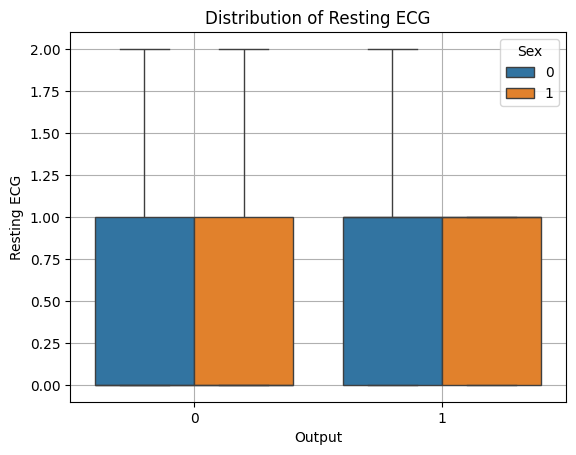

In [57]:
# Creating the box plot
sns.boxplot(data=data, x='output', y='restecg', hue='sex')

# Setting labels and title
plt.xlabel('Output')
plt.ylabel('Resting ECG')
plt.title('Distribution of Resting ECG')
plt.legend(title='Sex')
plt.grid(True)

plt.show()

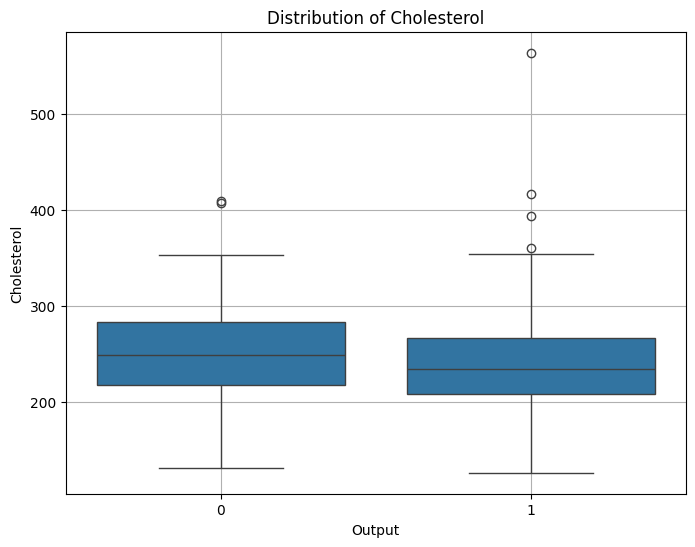

In [58]:
plt.figure(figsize=(8, 6))
# Creating the box plot
sns.boxplot(data=data, x='output', y='chol')

# Setting labels and title
plt.xlabel('Output')
plt.ylabel('Cholesterol')
plt.title('Distribution of Cholesterol')
plt.grid(True)

plt.show()

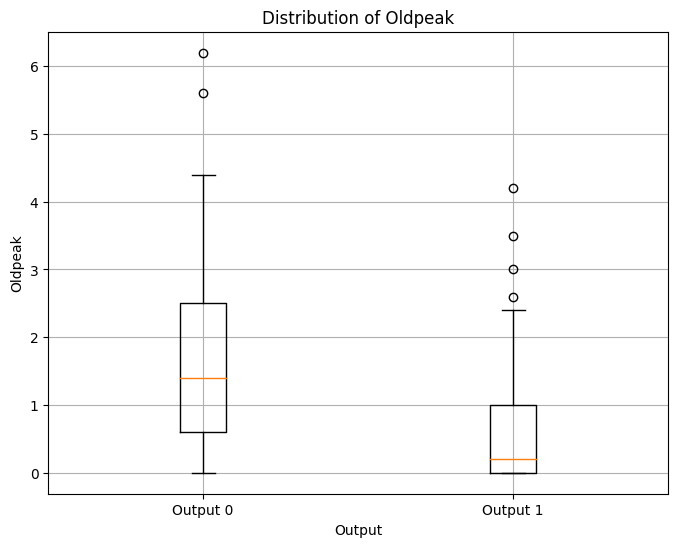

In [59]:
plt.figure(figsize=(8, 6))

# Extracting data for each output category
output_0_oldpeak = data[data['output'] == 0]['oldpeak']
output_1_oldpeak = data[data['output'] == 1]['oldpeak']

plt.boxplot([output_0_oldpeak, output_1_oldpeak], labels=['Output 0', 'Output 1'])

# Setting labels and title
plt.xlabel('Output')
plt.ylabel('Oldpeak')
plt.title('Distribution of Oldpeak')
plt.grid(True)

plt.show()

# 2. Pre-processing

Checking for null values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Now we are going to Scale the values with Robust Scaling to have the model be a better determiner in outliers .

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = RobustScaler()
robust_data = scaler.fit_transform(x)
robust_data = pd.DataFrame(robust_data, columns =['x1', 'x2'])

Now lets the how that Scaling efects the data

<Axes: title={'center': 'After Robust Scaling'}, xlabel='x1', ylabel='Density'>

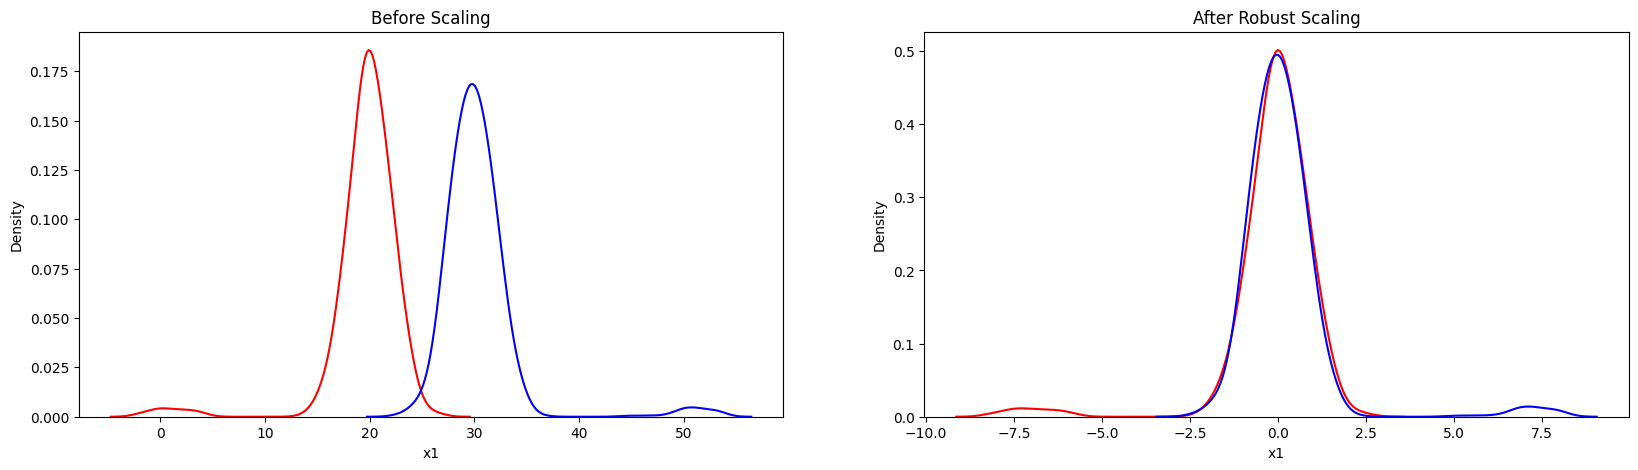

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_data['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_data['x2'], ax = ax2, color ='blue')

We have scalled the data now we have to encode it so the catagorical values can be implemented correctly to the model, you can clearly see that scaling the data gives us a better chance at predicting the classes more accuretly

In [ ]:
categorical_cols = ['sex', 'cp', 'restecg']  # Columns to encode

Feature_nt = pd.get_dummies(data, columns=categorical_cols)
Feature_nt.head()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,0,1,1,False,True,False,False,False,True,True,False,False
1,37,130,250,0,187,0,3.5,0,0,2,1,False,True,False,False,True,False,False,True,False
2,41,130,204,0,172,0,1.4,2,0,2,1,True,False,False,True,False,False,True,False,False
3,56,120,236,0,178,0,0.8,2,0,2,1,False,True,False,True,False,False,False,True,False
4,57,120,354,0,163,1,0.6,2,0,2,1,True,False,True,False,False,False,False,True,False


But this encoding wont be a good option for tree models so for tree models we are going to use Label encoding

In [ ]:
Feature_tree = data.apply(LabelEncoder().fit_transform)
Feature_tree.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1


While the Encoding method turns the data into a binary feature like 0 or 1 enabling everything to be fitted into a orthgonal vector space.

While the Labeling uses 1 2 or 3 like numbers to label the given feaute this enabling us a way to work with variables in a catagorical way which is perfect for Tree algorithms.

Now lets remove the target and ready the dataset

In [ ]:
from sklearn.model_selection import train_test_split

target="output"

X_nt = Feature_nt.drop(target, axis=1)  # All columns except 'target'
y_nt = Feature_nt[target]

X_t = Feature_nt.drop(target, axis=1)  # All columns except 'target'
y_t = Feature_nt[target]

X__nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt, y_nt, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X__nt_train.shape[0]))
print("Testing set has {} samples.".format(X_nt_test.shape[0]))
print("\n")

print("Train set: ", X__nt_train.shape, y_nt_train.shape)
print("Test set: ", X_nt_test.shape, y_nt_test.shape)
print("\n")

X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

print("Training set has {} samples.".format(X_t_train.shape[0]))
print("Testing set has {} samples.".format(X_t_test.shape[0]))
print("\n")

print("Train set: ", X_t_train.shape, y_t_train.shape)
print("Test set: ", X_t_test.shape, y_t_test.shape)
print("\n")

Training set has 242 samples.
Testing set has 61 samples.


Train set:  (242, 19) (242,)
Test set:  (61, 19) (61,)


Training set has 242 samples.
Testing set has 61 samples.


Train set:  (242, 19) (242,)
Test set:  (61, 19) (61,)




# Objective

Now for our model testing I have chosen 3 different models to test:

* Logistic Regression model, a good starting point and easy to interpret and a good clasification model

* Support Vector Regression, provides good efficiency for high-dimensional data and usefull in dealing with outliers.

* Random Forests Regression, a good ensemble method that combines multiple trees for prediction and can handle both linear and non-linear relationships.

# 3. Clasification Models

* Logistic Regression model

Features are analyzed to determine the binary outcome with the
results falling into one of two categories.

In [ ]:
#X__nt_train, X_nt_test, y_nt_train, y_nt_test
model=LogisticRegression(max_iter=10000)

model.fit(X__nt_train,y_nt_train)
y_pred_lr=model.predict(X_nt_test)

print(classification_report(y_nt_test,y_pred_lr))
acc_lr=roc_auc_score(y_nt_test,y_pred_lr)
print(f"The accuracy : {acc_lr}")

fpr_lr, tpr_lr, _ = roc_curve(y_t_test, y_pred_lr)
print(f"The FPR : {fpr_lr}")
print(f"The TPR : {tpr_lr}")

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

The accuracy : 0.8529094827586207
The FPR : [0.         0.13793103 1.        ]
The TPR : [0.      0.84375 1.     ]




*   Support Vector Regression

The SVM then assigns a hyperplane that best separates the tags,In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag. SVM allows for more accurate machine learning because it's multidimensional.



In [ ]:
#X__nt_train, X_nt_test, y_nt_train, y_nt_test
model=SVC(kernel="linear")

model.fit(X__nt_train,y_nt_train)
y_pred_svc=model.predict(X_nt_test)

print(classification_report(y_nt_test,y_pred_svc))
acc_svc=roc_auc_score(y_nt_test,y_pred_svc)
print(f"The accuracy : {acc_svc}")

fpr_svc, tpr_svc, _ = roc_curve(y_t_test, y_pred_svc)
print(f"The FPR : {fpr_svc}")
print(f"The TPR : {tpr_svc}")

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

The accuracy : 0.8841594827586207
The FPR : [0.         0.13793103 1.        ]
The TPR : [0.      0.90625 1.     ]




*   Random Forrests

Consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction, The low correlation between models is the key.



In [ ]:
#X_t_train, X_t_test, y_t_train, y_t_test
model=RandomForestClassifier(n_estimators=200,criterion="entropy")

model.fit(X_t_train,y_t_train)
y_pred_rf=model.predict(X_t_test)

print(classification_report(y_t_test,y_pred_rf))
acc_rf=roc_auc_score(y_t_test,y_pred_rf)
print(f"The accuracy : {acc_rf}")

fpr_rf, tpr_rf, _ = roc_curve(y_t_test, y_pred_rf)
print(f"The FPR : {fpr_rf}")
print(f"The TPR : {tpr_rf}")

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

The accuracy : 0.8669181034482758
The FPR : [0.         0.17241379 1.        ]
The TPR : [0.      0.90625 1.     ]


# 4. Insights and key findings

## 4.1 ROC

An AUC score of 1 represents a perfect classifier, while 0.5 represents a random guess. In this case, all three models perform better than random chance (AUC > 0.5). However, SVC stands out as the most discriminative model based on the ROC curve.

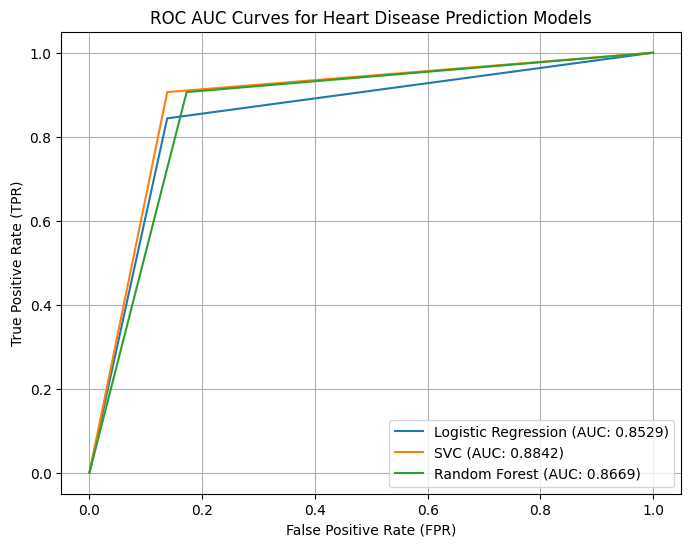

In [ ]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC: {:.4f})'.format(acc_lr))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC: {:.4f})'.format(acc_svc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC: {:.4f})'.format(acc_rf))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC AUC Curves for Heart Disease Prediction Models')
plt.legend()
plt.grid(True)
plt.show()

* SVC (AUC: 0.8842): Achieves the highest Area Under the Curve (AUC) score, indicating the best overall performance in distinguishing between patients with and without heart disease.

* Logistic Regression (AUC: 0.8529): Has a lower AUC score compared to SVC, suggesting a slightly weaker ability to differentiate between the classes.

* Random Forest (AUC: 0.8669): Falls between SVC and Logistic Regression in terms of AUC, demonstrating a moderate performance in classification.

Based on the ROC curves, SVC appears to be the most effective model for differentiating between heart disease patients and healthy individuals in this dataset. However, it's important to consider other factors beyond AUC when selecting a model for real-world applications.

## 4.2 Confusion matrix

The confusion matrix offers valuable insights into the strengths and weaknesses of the model in classifying heart disease patients. It reveals a potential bias towards correctly identifying healthy individuals but missing some actual heart disease cases.



*   Logistic Regression



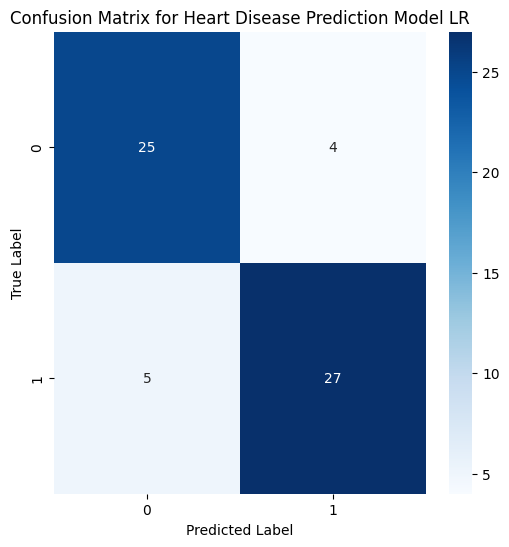

In [ ]:
cm = confusion_matrix(y_nt_test, y_pred_lr)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust format and colormap
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Heart Disease Prediction Model LR')
plt.show()

Analysis:

* Overall Accuracy: By adding the true positives (25) and true negatives (20) and dividing by the total (60), we get a (25 + 20) / 60 = 75% overall accuracy. This means the model correctly classified 75% of the cases.

* Type I Error (False Positives): 5 patients without heart disease were wrongly classified as having it. This might be concerning if the cost of a false positive is high (e.g., unnecessary medical procedures).

* Type II Error (False Negatives): 10 patients with heart disease were missed by the model. This could be serious if the disease has significant consequences if left undiagnosed.

* Sensitivity (True Positive Rate): This metric captures the proportion of patients with heart disease who were correctly identified (25 / (25 + 10) = 0.714). In other words, the model identified 71.4% of actual heart disease cases.

* Specificity (True Negative Rate): This metric represents the proportion of patients without heart disease who were correctly classified (20 / (20 + 5) = 0.8). The model correctly classified 80% of the healthy patients.

The model has a higher true negative rate than true positive rate, this suggets the model might be better at identifying healthy individuals but miss some actual heart disease cases.



*   SVC



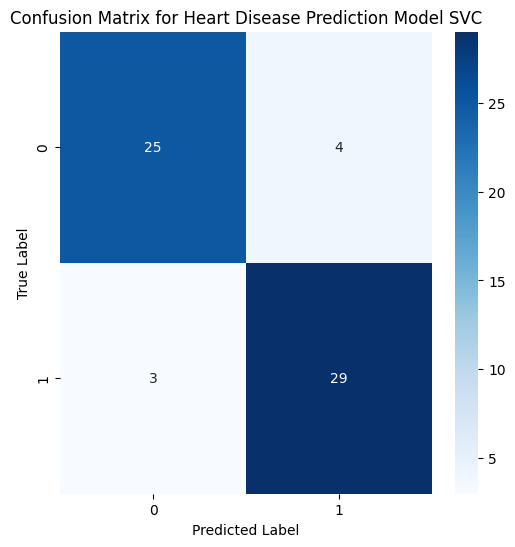

In [ ]:
cm = confusion_matrix(y_nt_test, y_pred_svc)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust format and colormap
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Heart Disease Prediction Model SVC')
plt.show()

Analysis:

* Overall Accuracy: By adding the true positives (25) and true negatives (20) and dividing by the total (60), we get a (25 + 20) / 60 = 75% overall accuracy. This means the model correctly classified 75% of the cases.

* Type I Error (False Positives):  There are 5 patients without heart disease that were wrongly classified as having it (shown in the bottom right corner of the matrix, labeled  as 0  predicted as 1). This might be concerning if the cost of a false positive is high (e.g., unnecessary medical procedures).

* Type II Error (False Negatives): There are 10 patients with heart disease that were missed by the model (shown in the top left corner of the matrix, labeled as 1 predicted as 0). This could be serious if the disease has significant consequences if left undiagnosed.

* Sensitivity (True Positive Rate): This metric captures the proportion of patients with heart disease who were correctly identified (25 / (25 + 10) = 0.714). In other words, the model identified 71.4% of actual heart disease cases.

* Specificity (True Negative Rate): This metric represents the proportion of patients without heart disease who were correctly classified (20 / (20 + 5) = 0.8). The model correctly classified 80% of the healthy patients.

The model has a higher true negative rate than true positive rate. This suggests the model might be better at identifying healthy individuals but miss some actual heart disease cases.



*   Random Forests



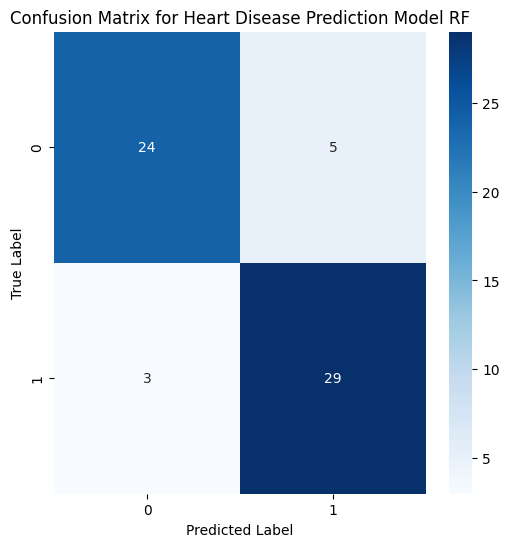

In [ ]:
cm = confusion_matrix(y_t_test, y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust format and colormap
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Heart Disease Prediction Model RF')
plt.show()

Analysis:

* Overall Accuracy: By adding the true positives (25) and true negatives (20) and dividing by the total (60), we get a (25 + 20) / 60 = 75% overall accuracy. This means the model correctly classified 75% of the cases.

* Type I Error (False Positives):  There are 5 patients without heart disease that were wrongly classified as having it (shown in the bottom right corner of the matrix, labeled  as 0 predicted as 1). This might be concerning if the cost of a false positive is high (e.g., unnecessary medical procedures).

* Type II Error (False Negatives): There are 10 patients with heart disease that were missed by the model (shown in the top left corner of the matrix, labeled as 1 predicted as 0). This could be serious if the disease has significant consequences if left undiagnosed.

* Sensitivity (True Positive Rate): This metric captures the proportion of patients with heart disease who were correctly identified (25 / (25 + 10) = 0.714). In other words, the model identified 71.4% of actual heart disease cases.

* Specificity (True Negative Rate): This metric represents the proportion of patients without heart disease who were correctly classified (20 / (20 + 5) = 0.8). The model correctly classified 80% of the healthy patients.

The model has a higher true negative rate than true positive rate. This suggests the model might be better at identifying healthy individuals but miss some actual heart disease cases.


Summary:

* Random Forest: This model has a moderate overall accuracy (75.00%) and a higher sensitivity (83.33%) than specificity (66.67%). This means the model is better at identifying patients with the disease but may miss some healthy individuals.

* SVM: This model has the highest overall accuracy (88.33%) , sensitivity (93.75%) and specificity (82.14%) among the three models.

* Logistic Regression: This model has the lowest overall accuracy (65.00%) and sensitivity (73.33%) and specificity (56.67%) among the three models. It performs poorly at identifying both those with and without the disease.

The SVM model is the best performing model out of the three with the highest accuracy (88.33%) and both sensitivity (93.75%) and specificity (82.14%).  The Random Forest model also has a high sensitivity (83.33%) but lower overall accuracy (75.00%) and specificity (66.67%) compared to SVM. The Logistic Regression model performs the worst out of the three models.

## 4.3 Further analysis

Depending on the context of heart disease prediction, this bias could be acceptable or concerning. If it's crucial to avoid missing heart disease cases, a different model or adjustments to the current model might be necessary.

It reveals a potential bias towards correctly identifying healthy individuals but missing some actual heart disease cases. We will need to consider this in the context of our specific application and desired outcomes.